In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The agenda of this notebook is to visualise the trends in the e-commerce dataset to find out most about the buyers who spend more time website or app of the company.
We also have to find out how much the app and the website are contributing to the sales individually.

In [2]:
cs = pd.read_csv('Ecommerce Customers')

In [3]:
cs.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


We see that Time on App, Time of Website , Length of membership ,Year amount Spent are numeric objects. We will start finding out the distribution between these attributes with Yearly amount spent.

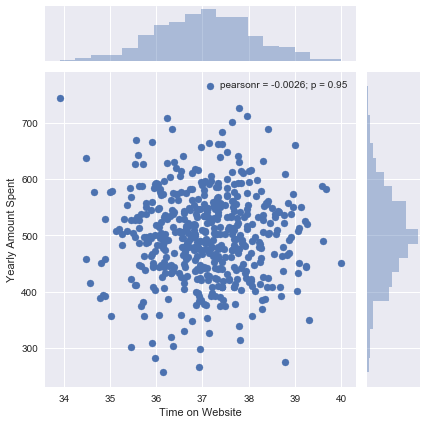

In [5]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cs)


In [6]:
cs[['Time on Website','Yearly Amount Spent']].describe()

,Time on Website,Yearly Amount Spent
count,500.000000,500.000000
mean,37.060445,499.314038
std,1.010489,79.314782
min,33.913847,256.670582
25%,36.349257,445.038277
50%,37.069367,498.887875
75%,37.716432,549.313828
max,40.005182,765.518462


As you can see , the upper and lower quartiles of the two attributes plotted are show. Most of the points are plotted from the range of the upper and lower quartiles of both attributes resulting in higher and stable bins of the histogram and conjusted data points between x( 36 to 37.8) and y( 445 to 560).

Now let us check with other attriubtes and write down the inferences.

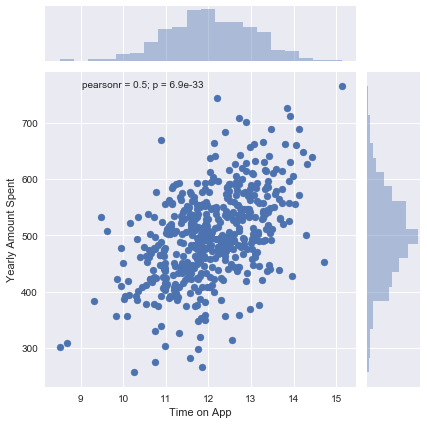

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cs)

In [8]:
cs[['Time on App','Yearly Amount Spent']].describe()

,Time on App,Yearly Amount Spent
count,500.000000,500.000000
mean,12.052488,499.314038
std,0.994216,79.314782
min,8.508152,256.670582
25%,11.388153,445.038277
50%,11.983231,498.887875
75%,12.753850,549.313828
max,15.126994,765.518462


Now you can see the most time spent of app from the 11 to 12.8 approximately by seeing the concenteration of data points and the width of the bins of the histogram. We can also infer that people who are spending the time on app from 11 to 12 are buying more products of more value. But this inference is the trend of this dataset and cannot be assumend for the whole trend of the e-commerece website in general. 

Now lets move on to LINEAR REGRESSION to find out how much the app and website are contributing in the overall price value of the company.

In [9]:
y = cs['Yearly Amount Spent']

In [22]:
x = cs.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis = 1  )

In [23]:
#inorder to find the linear relationship between time on app and website with yearly price value we have to eliminate
#the attributes which are strings such as email address avatar etc ..!! 

In [24]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [25]:
#now we have only the numeric attributes for the x values 

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test, y_train, y_test= train_test_split(x,y , test_size = 0.3,random_state = 101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#instead of prediction now we will examine and interpret the co-effcients of the 

In [32]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


How can you interpret these coefficients?

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

Do you think the company should focus more on their mobile app or on their website?

Yes, The company should focus more on their app because it is giving enormus increase in total money spent in comparison with the website.